In [8]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

In [10]:
cd ..

/Users/yeehonglow/Documents/Imperial/Machine-Learning-to-Track-Cloud-Computing


In [11]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
from random import randrange
import progressbar
from sklearn.cluster import AgglomerativeClustering as agc
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima_model import ARIMA

SELECT_NUMBER = 1000

random.seed(1)
x_axis = np.arange(0, 29-1/288, 1/288).tolist()
np_cpu = np.load("dataset//google-cpu-full.npy") 

We would like to only consider the machines with the highest correlations. We first calculate the correlation between all of the machines acoss 

In [17]:
# df_cpu is a dataframe with all the cpu utilisation data (columns = machine; rows = time)

df_cpu = pd.DataFrame(np_cpu).transpose().iloc[:-33]
df_cpu

,0,1,2,3,4,5,6,7,8,9,...,12466,12467,12468,12469,12470,12471,12472,12473,12474,12475
0,0.253672,0.079161,0.206047,0.663605,0.382621,0.295668,0.184070,0.496593,0.525418,0.290140,...,0.375723,0.408478,0.210300,0.736583,0.197652,0.252940,0.502969,0.491815,0.385068,0.162004
1,0.244409,0.085044,0.196264,0.818703,0.402819,0.297955,0.213957,0.350278,0.573250,0.317034,...,0.470169,0.412815,0.166844,0.809824,0.162657,0.290303,0.412357,0.445945,0.468362,0.334348
2,0.286186,0.126529,0.245121,0.830427,0.411507,0.296759,0.351503,0.293486,0.555317,0.368492,...,0.483236,0.413504,0.164896,0.543337,0.232658,0.270588,0.161209,0.476118,0.486091,0.241277
3,0.282959,0.567100,0.784541,0.805947,0.411052,0.310281,0.368436,0.293222,0.528925,0.279950,...,0.472866,0.433755,0.169487,0.800869,0.217257,0.293129,0.564685,0.748201,0.744447,0.246259
4,0.267864,0.568513,0.625622,0.788383,0.398860,0.354702,0.362917,0.414586,0.548902,0.245887,...,0.470394,0.079542,0.161834,0.829667,0.250794,0.277118,0.516919,0.705893,0.711830,0.307020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8313,0.360116,0.421885,0.203981,0.233525,0.109446,0.239819,0.250049,0.098761,0.200595,0.136422,...,0.132390,0.272088,0.111850,0.457003,0.303150,0.354244,0.298454,0.205314,0.129465,0.327796
8314,0.362263,0.311366,0.455806,0.245492,0.108742,0.240046,0.206760,0.100170,0.192283,0.124357,...,0.174067,0.255670,0.110919,0.452675,0.357220,0.456430,0.329026,0.185720,0.134255,0.303741
8315,0.353284,0.286414,0.449383,0.255302,0.107698,0.227358,0.175994,0.098761,0.198344,0.128449,...,0.227165,0.192814,0.112557,0.454342,0.332720,0.415568,0.291380,0.180987,0.131710,0.256081
8316,0.336732,0.258560,0.414796,0.196945,0.110738,0.233530,0.108868,0.090715,0.182867,0.114614,...,0.231024,0.166013,0.118202,0.345110,0.178616,0.326134,0.145217,0.162554,0.167205,0.165261


In [9]:
# loading correlation matrix from csv
all_cpu_correlation = pd.read_csv('all_cpu_correlation.csv')

column_name_map = {}
for x in range (0,12476):
    column_name_map[str(x)]= x
    
all_cpu_correlation = all_cpu_correlation.drop(["Unnamed: 0"], axis = 1)

# Note that we take the absolute value
all_cpu_correlation = all_cpu_correlation.rename(columns = column_name_map).abs()
all_cpu_correlation

,0,1,2,3,4,5,6,7,8,9,...,12466,12467,12468,12469,12470,12471,12472,12473,12474,12475
0,1.000000,0.182548,0.293396,0.147556,0.371543,0.434098,0.198072,0.413441,0.296714,0.489531,...,0.013233,0.337846,0.506589,0.326902,0.361901,0.531176,0.364277,0.303356,0.061162,0.363819
1,0.182548,1.000000,0.243375,0.189525,0.006541,0.171590,0.244268,0.087363,0.352426,0.361932,...,0.155401,0.136400,0.145904,0.137189,0.287106,0.303303,0.174202,0.118051,0.196405,0.302263
2,0.293396,0.243375,1.000000,0.140648,0.112303,0.053745,0.186293,0.054868,0.186472,0.278411,...,0.026876,0.125050,0.115339,0.140605,0.198736,0.316958,0.217808,0.068587,0.011677,0.156072
3,0.147556,0.189525,0.140648,1.000000,0.058056,0.253711,0.241811,0.251068,0.339572,0.300277,...,0.232102,0.131432,0.212682,0.250599,0.263887,0.247532,0.298648,0.241237,0.212015,0.180568
4,0.371543,0.006541,0.112303,0.058056,1.000000,0.014277,0.045071,0.115329,0.105065,0.121746,...,0.329945,0.003419,0.198718,0.068762,0.084708,0.264060,0.211030,0.151725,0.326329,0.050278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12471,0.531176,0.303303,0.316958,0.247532,0.264060,0.408752,0.334992,0.431348,0.417225,0.535413,...,0.240960,0.273504,0.496323,0.345101,0.502203,1.000000,0.445638,0.316005,0.106159,0.409110
12472,0.364277,0.174202,0.217808,0.298648,0.211030,0.260090,0.144117,0.277020,0.254723,0.344410,...,0.029994,0.169839,0.366731,0.100655,0.339365,0.445638,1.000000,0.164062,0.050031,0.275456
12473,0.303356,0.118051,0.068587,0.241237,0.151725,0.477328,0.258073,0.400237,0.392263,0.392945,...,0.408976,0.394879,0.422945,0.379233,0.305568,0.316005,0.164062,1.000000,0.326421,0.262081
12474,0.061162,0.196405,0.011677,0.212015,0.326329,0.185391,0.253849,0.212569,0.326837,0.271802,...,0.430247,0.196720,0.148528,0.163455,0.279633,0.106159,0.050031,0.326421,1.000000,0.105131


In [14]:
# to read updated_selected_machines from csv, copy the following code

selected_machines_cpu = pd.read_csv("derived_dataset//df_updated_selected_machines.csv", header = None)[1]
selected_machines_cpu

0           0
1          22
2          30
3          76
4         100
        ...  
1157    12430
1158    12435
1159    12448
1160    12450
1161    12462
Name: 1, Length: 1162, dtype: int64

In [3]:
def min_corr_in_each_cluster(cpu_data, window = 5, number_of_cluster = 100, time_limit = None):
    # returns a dataframe of minimum correlation in each cluster at different time index
    # columns are clusters and rows are time index
    
    machine_index = cpu_data.columns
    map_min_corr = {}
    number_of_machine = len(cpu_data.columns)
    
    if time_limit == None:
        time_limit = len(cpu_data.index) - window
    
    with progressbar.ProgressBar(max_value = time_limit) as bar:
        for current_time in range(0, time_limit):
    
            bar.update(current_time)

            # computing the correlation matrix at current time index
            curr_corr_matrix = cpu_data.iloc[current_time:current_time+window].corr().abs()

            # perform clustering at current time index
            cluster = agc(n_clusters=number_of_cluster, affinity='euclidean', linkage='ward')
            clustering_output = cluster.fit_predict(curr_corr_matrix)

            # initialising a map for clusters
            cluster_map = {}
            for x in range(0,number_of_cluster):
                cluster_map[x] = []

            # get a map for each cluster
            # key is cluster index; values is list of machines in that cluster
            for x in range(0,number_of_machine):
                cluster_map[clustering_output[x]].append(machine_index[x])  

            # look for the minimum correlation in each cluster    
            current_min_corr_in_each_cluster = []
            for x in cluster_map.values():
                current_min_corr_in_each_cluster.append(curr_corr_matrix[x].loc[x].min().min()) 

            map_min_corr[current_time] = sorted(current_min_corr_in_each_cluster)
        
    return pd.DataFrame(map_min_corr).transpose()

In [19]:
change_in_min_corr = min_corr_in_each_cluster(df_cpu[selected_machines_cpu], 
                                              window = 5, 
                                              number_of_cluster = 100, 
                                              time_limit = 15)

100% (15 of 15) |########################| Elapsed Time: 0:00:14 Time:  0:00:14


In [22]:
# columns are clusters
# rows are time-step
# values are the minimum correlation in the cluster

change_in_min_corr.iloc[0:10]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.624641,0.695330,0.753479,0.759231,0.768212,0.774902,0.777356,0.781403,0.792514,0.793978,...,0.945782,0.948633,0.951010,0.953743,0.954125,0.954184,0.959062,0.960488,0.965262,0.966855
1,0.716709,0.748666,0.750241,0.769885,0.795677,0.800299,0.803523,0.805889,0.806269,0.807712,...,0.944146,0.950160,0.952725,0.954215,0.957212,0.957264,0.967639,0.972786,0.975173,0.976132
2,0.724726,0.739771,0.751149,0.754549,0.766992,0.783895,0.784828,0.787121,0.790775,0.794373,...,0.945911,0.946399,0.951401,0.951572,0.951936,0.952492,0.956282,0.958279,0.961559,0.971250
3,0.734899,0.742886,0.746910,0.750964,0.781582,0.784917,0.785672,0.788902,0.797889,0.798976,...,0.942141,0.951341,0.951632,0.951709,0.951970,0.955699,0.961370,0.964913,0.965326,0.968778
4,0.706765,0.749853,0.757637,0.771153,0.772628,0.777880,0.779320,0.781904,0.796800,0.803706,...,0.944865,0.950928,0.951539,0.952452,0.954762,0.957516,0.957680,0.959950,0.962570,0.964415
5,0.579794,0.649109,0.722225,0.734117,0.737912,0.746868,0.751544,0.767013,0.775924,0.776650,...,0.938205,0.940751,0.946425,0.953274,0.954046,0.957803,0.960849,0.960982,0.964177,0.964745
6,0.717397,0.723722,0.750336,0.751732,0.754515,0.763444,0.775876,0.779909,0.783759,0.788841,...,0.944309,0.946256,0.947739,0.948829,0.952669,0.952788,0.955511,0.960625,0.963192,0.964892
7,0.677775,0.710342,0.757594,0.760360,0.764308,0.769878,0.783788,0.791743,0.792041,0.796710,...,0.945420,0.946823,0.947738,0.948252,0.951775,0.953118,0.953716,0.960878,0.970741,0.981310
8,0.684597,0.738889,0.746262,0.749432,0.766979,0.770545,0.772616,0.778907,0.790819,0.797450,...,0.941481,0.941846,0.953100,0.953247,0.954788,0.954894,0.955202,0.955579,0.955976,0.958373
9,0.666382,0.737433,0.771294,0.781506,0.786159,0.793969,0.796341,0.798145,0.804547,0.806409,...,0.946530,0.948055,0.948694,0.950311,0.953528,0.954984,0.955181,0.965978,0.973231,0.980243


In [22]:
# index [0] of change_in_min_corr is the average minimum correlation in all clusters over time

change_in_min_corr.mean(axis = 0)

# we see that it is 0.735235 which is high, so the combinations of hyperparameters is suitable

0     0.735235
1     0.758827
2     0.783371
3     0.791237
4     0.800522
        ...   
95    0.968315
96    0.969671
97    0.972676
98    0.975160
99    0.978739
Length: 100, dtype: float64

In [79]:
# the correlation based method

def cluster_map(correlation_matrix, number_of_cluster):
    # takes in correlation matrix and creates a map of cluster index to list of machine index in the cluster
    
    machine_index = correlation_matrix.columns
    number_of_machine = len(machine_index)
    
    # computing the clusters
    cluster = agc(n_clusters=number_of_cluster, affinity='euclidean', linkage='ward')
#     print(correlation_matrix)
    clustering_output = cluster.fit_predict(correlation_matrix)
    
    # initialising a map for clusters
    cluster_map = {}
    for x in range(0,number_of_cluster):
        cluster_map[x] = []

    # get a map for each cluster
    # key is cluster index; values is list of machines in that cluster
    for x in range(0,number_of_machine):
        cluster_map[clustering_output[x]].append(machine_index[x])
        
    return cluster_map

def get_best_machine(correlation_matrix):
    # takes in the correlation_matrix
    # returns the index of the machine which minimises the correlation 
    # between all machines
    
    # Take the sum of the squared correlation of all machines
    # Note that taking the sum penalizes small values and rewards large values
    squared_matrix = (correlation_matrix**2).sum()
    
    return squared_matrix.idxmax()

def get_regression_parameters(cpu_data, best_machine):
    # get the linear regression parameters for each machine wrt the best machine
    # returns a sklearn.linear_model._base.LinearRegression (model)
    
    model_list = []
    for cpu_index in cpu_data.columns:
        X = np.array(cpu_data[best_machine]).reshape(-1,1)
        model = LinearRegression().fit(X, cpu_data[cpu_index])
        model_list.append(model)
        
    return model_list   

def arima_predictions(timeseries, input_arima_order = (3,0,0)):
    # takes in a timeseries
    # outputs a single prediction in the next timestep
    
    timeseries = timeseries.values
    model = ARIMA(timeseries, order = input_arima_order)
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0][0]
    
    return prediction

def get_cluster_predictions(cpu_data, curr_time_segment, cluster_corr_matrix, input_arima_order):
    # takes in information about a cluster 
    # cpu_data is the full length of values of all the timeseries IN THE CLUSTER
    # curr_time_segment is the windowed version of cpu_data
    
    # makes predictions for all machines in cluster at next single timestep
    # returns a map of machine to predictions
    
    # get best machine
    best_machine = get_best_machine(cluster_corr_matrix)
#     print("best_machine: ", best_machine)
    
    # get_regression_parameters wrt best machine for every machine
    linreg_model_list = get_regression_parameters(curr_time_segment, best_machine)
    
    # make predictions on best machine
    best_machine_prediction = arima_predictions(cpu_data[best_machine], input_arima_order = input_arima_order)
    
#     if(best_machine_prediction > 1):
#         print("best_machine_prediction: ", best_machine_prediction)
#         print("best_machine: ", best_machine)
#         print("current_time: ", cpu_data.iloc[-1].index)
    
    # scale all the other machines to fit the best machine
    cluster_prediction = dict()
    for index, machine_index in enumerate(cpu_data.columns):
        current_prediction = linreg_model_list[index].predict(np.array(best_machine_prediction).reshape(-1,1))[0]
        
        # if the prediction is out of bounds, use arima to predict instead
        if(current_prediction > 1 or current_prediction < 0):
            current_prediction = arima_predictions(cpu_data[machine_index], input_arima_order = input_arima_order)
            
#             print("best_machine_prediction: ", best_machine_prediction)
#             print("current_prediction: ", current_prediction)
#             print("current_machine: ", machine_index)
#             print("current_time: ", cpu_data.index[-1])
            
#         print("prediction: ", linreg_model_list[index].predict(np.array(best_machine_prediction).reshape(-1,1))[0])
        cluster_prediction[machine_index] = current_prediction
        
    return cluster_prediction    

# class: cluster over time, best machine per cluster over time, correlation matrix for every time step

def corr_predictions(cpu_data, window = 6, number_of_cluster = 50, start_time = 288, end_time = None, rolling_error_window = 0):
    # returns a df matrix of prediction with columns as machine and rows as time index
    # prediction is made for from start_time to (end_time - 1) inclusive
    
    rolling_error_multiplier = 0.25
    arima_order = (3,0,0)
    machine_index = cpu_data.columns
    map_min_corr = {}
    number_of_machine = len(cpu_data.columns)
    all_predictions = pd.DataFrame(columns = cpu_data.columns)
    
    # df_rolling_error has the prediction error for the last 5 time-step for each machine
    df_rolling_error = pd.DataFrame(columns = cpu_data.columns)
    
    if end_time == None:
        end_time = len(cpu_data.index) - 1
    
    with progressbar.ProgressBar(max_value = end_time - start_time) as bar:
        for current_time in range(start_time, end_time):
    
            bar.update(current_time-start_time)

            # computing the correlation matrix at current time index
            curr_time_segment = cpu_data.iloc[current_time-window:current_time]
            curr_all_time = cpu_data.iloc[:current_time]
            curr_corr_matrix = curr_time_segment.corr().abs()
            
#             return curr_corr_matrix

            # perform clustering at current time index
            cluster = cluster_map(curr_corr_matrix, number_of_cluster = number_of_cluster) 

            # initialise dict for machine to prediction in current timestep
            curr_all_machine_pred = dict()

            for ls_machine_in_cluster in cluster.values():
                # make predictions for all machine in each cluster
                
#                 print("Machines in cluster: ", ls_machine_in_cluster)
                
                cluster_predictions = get_cluster_predictions(cpu_data = curr_all_time[ls_machine_in_cluster],
                                                              curr_time_segment = curr_time_segment[ls_machine_in_cluster],
                                                              cluster_corr_matrix = curr_corr_matrix[ls_machine_in_cluster].loc[ls_machine_in_cluster],
                                                              input_arima_order = arima_order)
                
#                 print("cluster_predictions: ", cluster_predictions)
                
                # curr_all_machine_pred is a dict with key = machine, value = current timestep prediction
                curr_all_machine_pred = {**curr_all_machine_pred, **cluster_predictions}
                
#             print(curr_all_machine_pred)    

            if rolling_error_window > 0:
        
                if len(df_rolling_error) == 0:
                    # 1st prediction does not have a rolling error
                    df_current_predictions = pd.DataFrame(curr_all_machine_pred, index = [current_time])
                else:
#                     print("got in here")
                    
                    # get final predictions by adding in the rolling error
#                     print("df_rolling_error: ", df_rolling_error.mean())
                    df_current_predictions = pd.DataFrame(curr_all_machine_pred, index = [current_time]) + rolling_error_multiplier * df_rolling_error.mean()

                # update the rolling error df for next time-step
                df_rolling_error = df_rolling_error.append(cpu_data.iloc[current_time] - df_current_predictions)

                # remove nunwanted history from the rolling error df
                if len(df_rolling_error) > rolling_error_window:
                    df_rolling_error = df_rolling_error.drop(df_rolling_error.index[0])
            
            else:
                df_current_predictions = pd.DataFrame(curr_all_machine_pred, index = [current_time])
                
            all_predictions = all_predictions.append(df_current_predictions, sort = True)
            
        
    return all_predictions

In [55]:
starting = 288*1
test_predictions = corr_predictions(selected_machines_cpu, 
                                    number_of_cluster = 50, 
                                    start_time = starting, 
                                    end_time = starting+72,
                                    rolling_error_window = 0)

test_predictions

# test_predictions give all the predictions for each machine at each time-step
# columns are machines and the rows are time-step

 70% (51 of 72) |#################       | Elapsed Time: 0:04:15 ETA:   0:01:38/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 73% (53 of 72) |#################       | Elapsed Time: 0:04:25 ETA:   0:01:32/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
100% (72 of 72) |########################| Elapsed Time: 0:06:05 Time:  0:06:05


,0,22,30,76,122,144,155,156,161,165,...,12316,12337,12350,12351,12361,12372,12405,12430,12450,12462
288,0.053003,0.253930,0.272103,0.068047,0.332630,0.214578,0.272329,0.074129,0.158274,0.314968,...,0.091050,0.208721,0.241641,0.296107,0.053735,0.291112,0.310430,0.294111,0.383341,0.286070
289,0.139708,0.251952,0.294589,0.063164,0.330129,0.212642,0.211670,0.060062,0.158806,0.319715,...,0.083200,0.197363,0.248061,0.283118,0.085156,0.290107,0.309143,0.278467,0.386253,0.290471
290,0.132599,0.246893,0.282511,0.057798,0.338439,0.145069,0.276130,0.067331,0.162392,0.320292,...,0.088260,0.206877,0.239019,0.280265,0.057855,0.293687,0.295209,0.304705,0.376767,0.303537
291,0.155480,0.258802,0.289165,0.062014,0.336389,0.206145,0.317887,0.077792,0.213052,0.278712,...,0.085590,0.211145,0.228539,0.298304,0.061947,0.295912,0.295814,0.274819,0.167365,0.320759
292,0.149868,0.246527,0.289563,0.063705,0.338472,0.204619,0.318110,0.148725,0.238379,0.303431,...,0.084818,0.172037,0.244005,0.287955,0.043292,0.305944,0.297546,0.278982,0.291653,0.322136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.053885,0.191122,0.243764,0.107929,0.261430,0.079439,0.120883,0.048253,0.119820,0.257708,...,0.239382,0.071494,0.221965,0.103247,0.137949,0.159876,0.234117,0.204348,0.100853,0.080754
356,0.168431,0.194344,0.240743,0.223747,0.259923,0.077118,0.136050,0.052055,0.135585,0.255955,...,0.251760,0.066924,0.222534,0.102918,0.104981,0.157148,0.230904,0.225753,0.215961,0.079258
357,0.217523,0.184943,0.238982,0.203147,0.254863,0.075686,0.134059,0.049851,0.121296,0.268951,...,0.244743,0.062014,0.222029,0.098978,0.084667,0.154790,0.223080,0.216641,0.231344,0.082986
358,0.173767,0.193423,0.234115,0.117546,0.250301,0.072093,0.164237,0.045189,0.116894,0.266577,...,0.190001,0.070438,0.216153,0.094431,0.142828,0.152186,0.217333,0.197370,0.186246,0.077279


In [58]:
mse = (test_predictions - selected_machines_cpu.iloc[starting:starting+72])**2
mse.mean().mean()

0.0018392666318320637

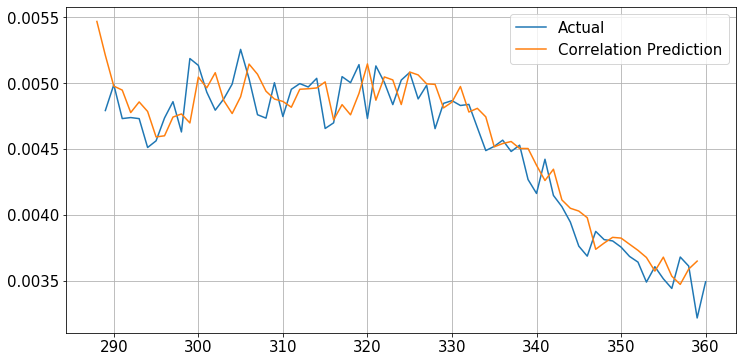

In [59]:
plt.figure(figsize= (12,6))
plt.plot(selected_machines_cpu[805].iloc[289:289+72], label = "Actual")
plt.plot(test_predictions[805], label = "Correlation Prediction")
plt.xlabel("sample")
plt.ylabel("Mean CPU Utilisation")
plt.title("Machine 805, Predicted vs Actual")
plt.legend()
plt.grid()

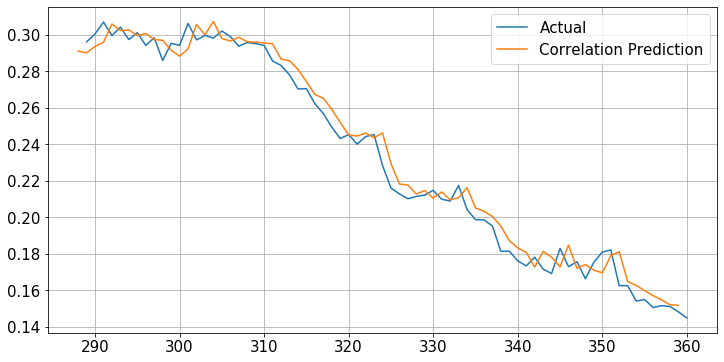

In [63]:
plt.figure(figsize= (12,6))
plt.plot(selected_machines_cpu[12372].iloc[289:289+72], label = "Actual")
plt.plot(test_predictions[12372], label = "Correlation Prediction")
plt.xlabel("sample")
plt.ylabel("Mean CPU Utilisation")
plt.title("Machine 12372, Predicted vs Actual")
plt.legend()
plt.grid()

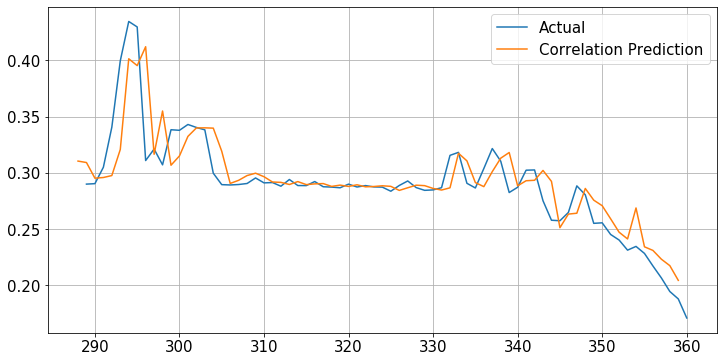

In [64]:
plt.figure(figsize= (12,6))
plt.plot(selected_machines_cpu[12405].iloc[289:289+72], label = "Actual")
plt.plot(test_predictions[12405], label = "Correlation Prediction")
plt.xlabel("sample")
plt.ylabel("Mean CPU Utilisation")
plt.title("Machine 12405, Predicted vs Actual")
plt.legend()
plt.grid()

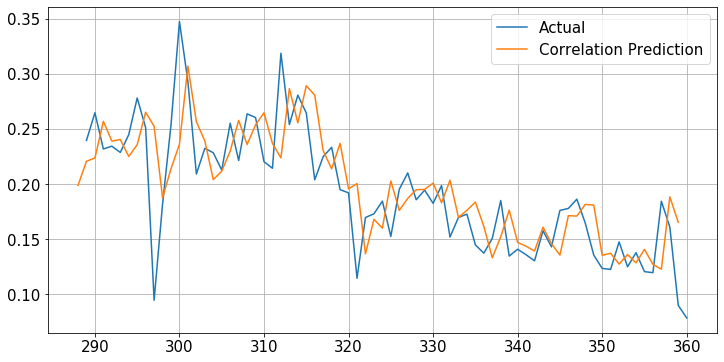

In [65]:
plt.figure(figsize= (12,6))
plt.plot(selected_machines_cpu[7178].iloc[289:289+72], label = "Actual")
plt.plot(test_predictions[7178], label = "Correlation Prediction")
plt.xlabel("sample")
plt.ylabel("Mean CPU Utilisation")
plt.title("Machine 7178, Predicted vs Actual")
plt.legend()
plt.grid()